# Sales Prediction Using Linear Regression

This Jupyter Notebook is dedicated to the task of predicting product sales using advertising budget data. We will apply machine learning techniques to build a regression model capable of estimating future sales based on expenditure in various advertising media such as TV, radio, and newspapers.

## Process Overview:
1. **Data Loading**: Load the data from a CSV file.
2. **Data Cleaning and Preparation**: Prepare the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Understand the data and discover patterns and relationships.
4. **Data Preprocessing**: Process the data for model training.
5. **Model Training**: Train a linear regression model on the data.
6. **Model Evaluation**: Evaluate the model's performance.
7. **Prediction and Conclusion**: Make predictions with the model and draw conclusions.

By following these steps, we aim to create an accurate and reliable sales prediction model.


In [39]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Append your filename to the path
file_name = "Advertising.csv"
data_path = os.path.join(current_directory, file_name)

print(data_path)


C:\Users\Hp\AI_ML_DS Projects\Advertising.csv\Advertising.csv


In [40]:
data_path = r'C:\Users\Hp\AI_ML_DS Projects\Advertising.csv'


In [41]:
import os

# If your file is located in "AI_ML_DS Projects" directory
directory_path = r'C:\Users\Hp\AI_ML_DS Projects'
file_name = "Advertising.csv"
data_path = os.path.join(directory_path, file_name)

print(data_path)


C:\Users\Hp\AI_ML_DS Projects\Advertising.csv


In [42]:
import pandas as pd

# Correct file path
data_path = r'C:\Users\Hp\AI_ML_DS Projects\Advertising.csv'

# Load the dataset into a pandas DataFrame
sales_data = pd.read_csv('Advertising.csv')

# Display the first few rows to inspect the data
sales_data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Dataset Statistics:


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000



Missing Values:


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

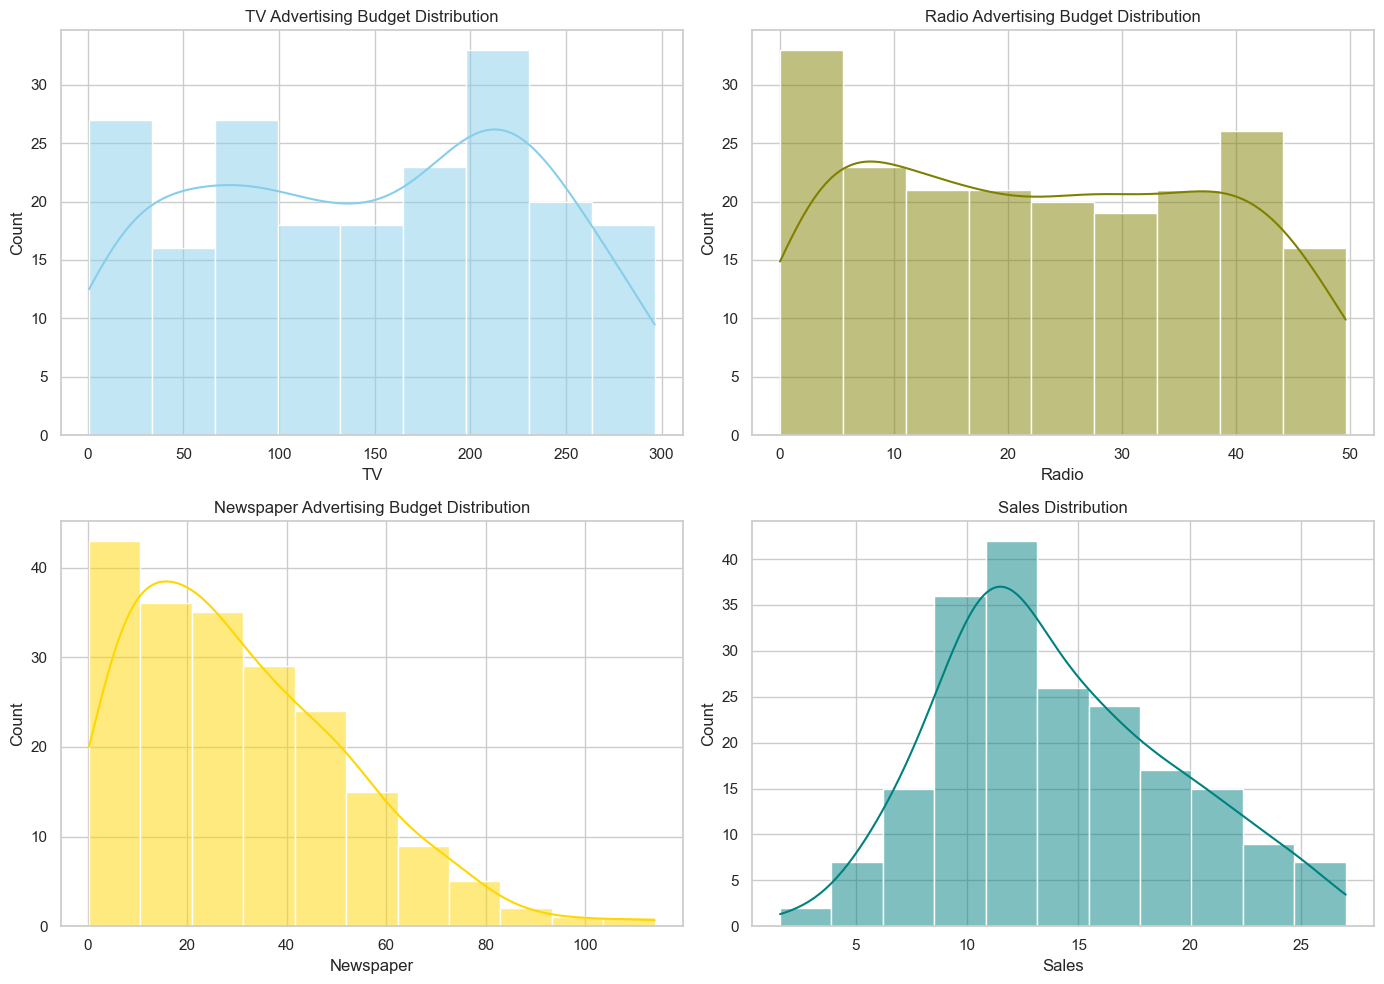

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


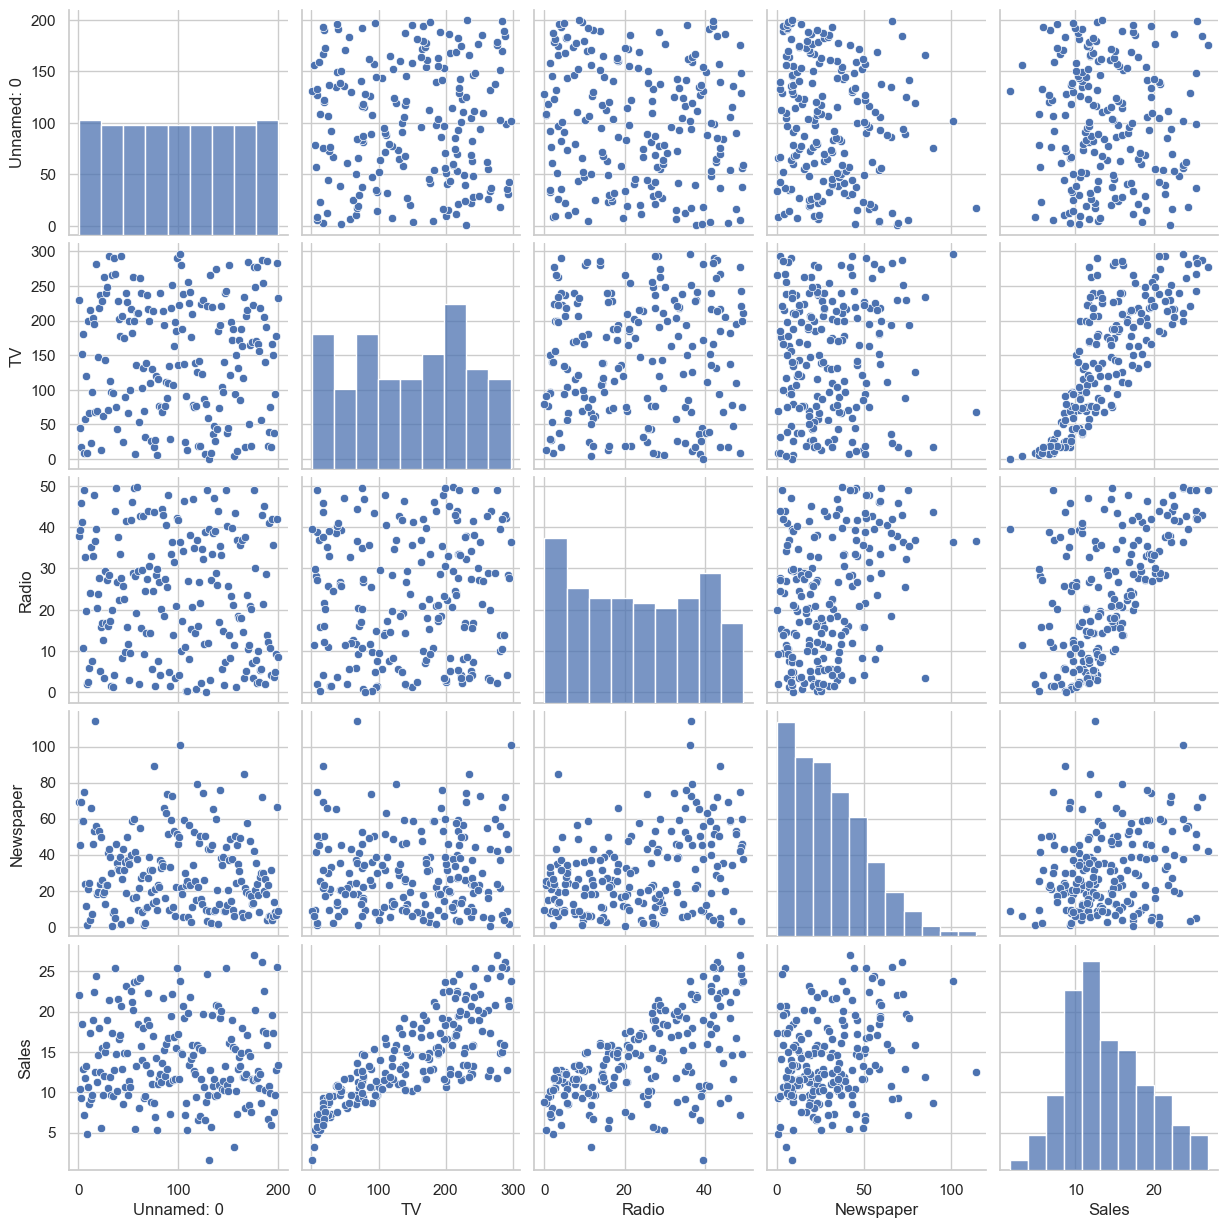

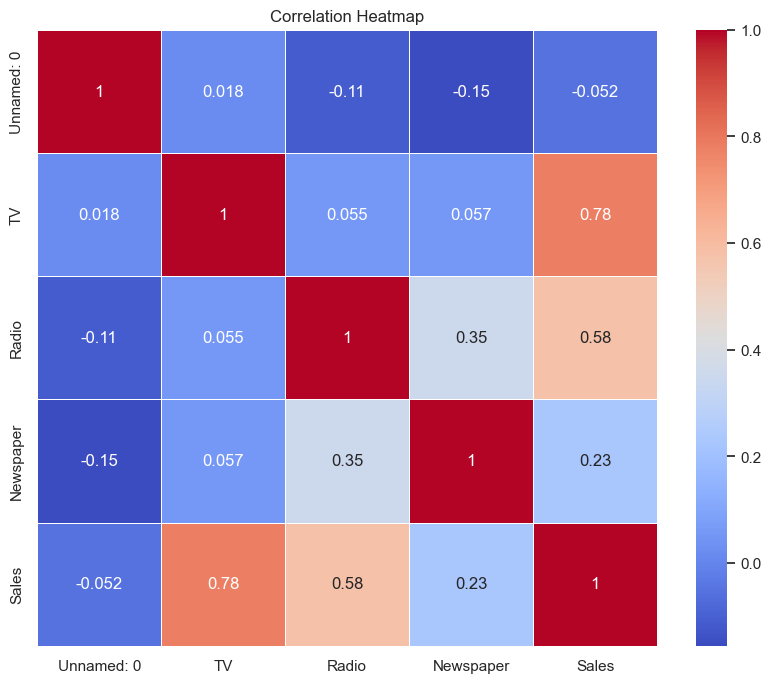

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Overview of dataset statistics
print("Dataset Statistics:")
display(sales_data.describe())

# Check for missing values
print("\nMissing Values:")
display(sales_data.isnull().sum())

# Distribution of features and target variable
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data=sales_data, x="TV", kde=True, ax=axs[0, 0], color="skyblue")
sns.histplot(data=sales_data, x="Radio", kde=True, ax=axs[0, 1], color="olive")
sns.histplot(data=sales_data, x="Newspaper", kde=True, ax=axs[1, 0], color="gold")
sns.histplot(data=sales_data, x="Sales", kde=True, ax=axs[1, 1], color="teal")

axs[0, 0].set_title("TV Advertising Budget Distribution")
axs[0, 1].set_title("Radio Advertising Budget Distribution")
axs[1, 0].set_title("Newspaper Advertising Budget Distribution")
axs[1, 1].set_title("Sales Distribution")

plt.tight_layout()
plt.show()

# Pairplot to visualize the relationships between variables
sns.pairplot(sales_data)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

# Dropping the 'Unnamed: 0' column as it's just an identifier
sales_data = sales_data.drop(columns=['Unnamed: 0'])

# Defining the features (X) and the target (y)
X = sales_data.drop('Sales', axis=1)  # Features: TV, Radio, Newspaper
y = sales_data['Sales']  # Target variable: Sales

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 160 samples
Testing set size: 40 samples


In [45]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Display the model's coefficients
print("Model coefficients:")
print(f"Intercept: {model.intercept_}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Model coefficients:
Intercept: 2.979067338122629
TV: 0.044729517468716326
Radio: 0.18919505423437655
Newspaper: 0.0027611143413671757


Mean Squared Error (MSE): 3.1740973539761046
R-squared (R2 ): 0.899438024100912


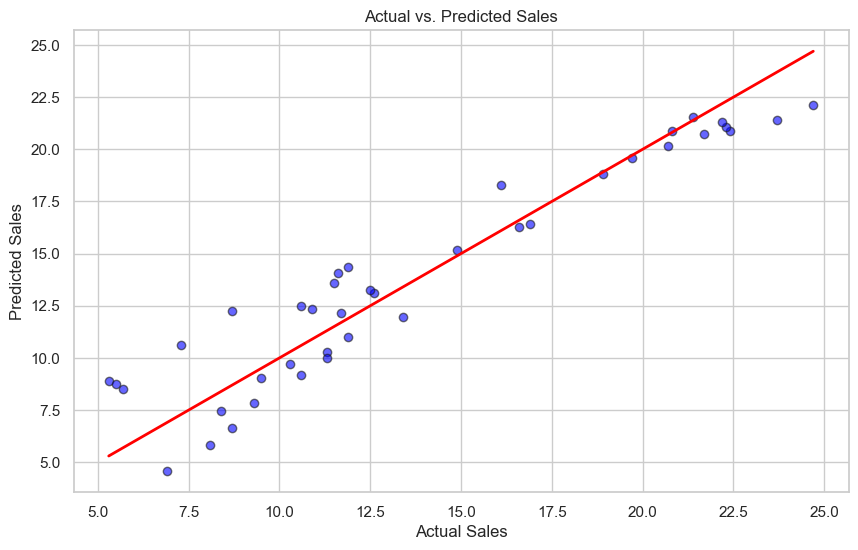

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

# Plotting actual vs predicted values for better visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # Line for perfect predictions
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()


In [47]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit a new linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Evaluate the new model
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Model MSE: {mse_poly}")
print(f"Polynomial Model R-squared: {r2_poly}")


Polynomial Model MSE: 0.4129102285379074
Polynomial Model R-squared: 0.9869181490609602
